In [1]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable


## Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df = pd.read_csv('twitter_training.csv', header=None)

# Exploratory Data Analysis

In [4]:
df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
df.columns = ['ID', 'Game', 'Sentiment', 'Text']

In [6]:
df.head()

,ID,Game,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
df.shape

(74682, 4)

In [8]:
df.columns

Index(['ID', 'Game', 'Sentiment', 'Text'], dtype='object')

In [9]:
df.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [10]:
df.info

<bound method DataFrame.info of          ID         Game Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                    Text  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window

## Data Cleaning

In [11]:
df.isnull().sum()

ID             0
Game           0
Sentiment      0
Text         686
dtype: int64

In [12]:
df=df.drop_duplicates()

In [13]:
df.shape

(71982, 4)

In [14]:
# Remove rows with missing text data
df = df.dropna(subset=['Text'])

In [15]:
df.isnull().sum()

ID           0
Game         0
Sentiment    0
Text         0
dtype: int64

In [16]:
df.shape

(71656, 4)

### Cleaning Text Data

In [17]:
# Function to clean text data
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply the clean_text function to the 'Text' column
df['Text'] = df['Text'].apply(clean_text)

# Sentiment Distribution

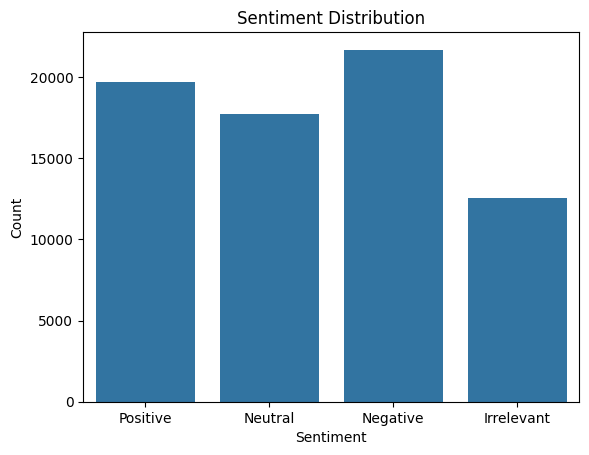

In [18]:
# Plot the distribution of sentiments
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

The plot shows that the largest sentiment category is Negative with 19,275 comments, followed closely by Neutral with 18,922 comments, Positive with 17,942 comments, and Irrelevant with 13,789 comments.

## Sentiment Analysis for Specific Topics or Brands

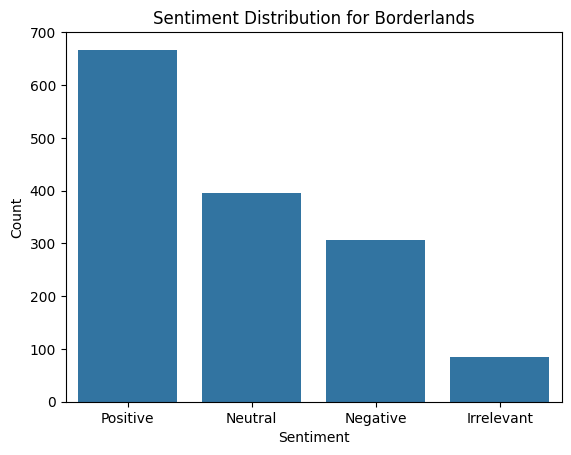

In [19]:
topic = 'Borderlands'

# Filter dataframe for the specific topic or brand
topic_df = df[df['Text'].str.contains(topic, case=False, na=False)]

# Plot the sentiment distribution for the specific topic or brand
sns.countplot(x='Sentiment', data=topic_df)
plt.title(f'Sentiment Distribution for {topic}')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

The plot shows that the largest sentiment category for Borderlands reviews is Positive with 624 comments, followed by Neutral with 404 comments, Negative with 261 comments, and Irrelevant with 89 comments.

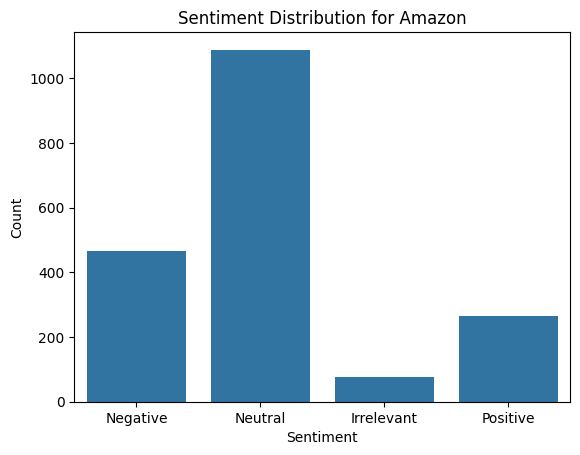

In [20]:
topic = 'Amazon'

# Filter dataframe for the specific topic or brand
topic_df = df[df['Text'].str.contains(topic, case=False, na=False)]

# Plot the sentiment distribution for the specific topic or brand
sns.countplot(x='Sentiment', data=topic_df)
plt.title(f'Sentiment Distribution for {topic}')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

The plot shows that the largest sentiment category for Amazon reviews is Neutral with 1050 comments, followed by Negative with 400 comments, Positive with 302 comments, and Irrelevant with 185 comments.

## Word Cloud Visualization

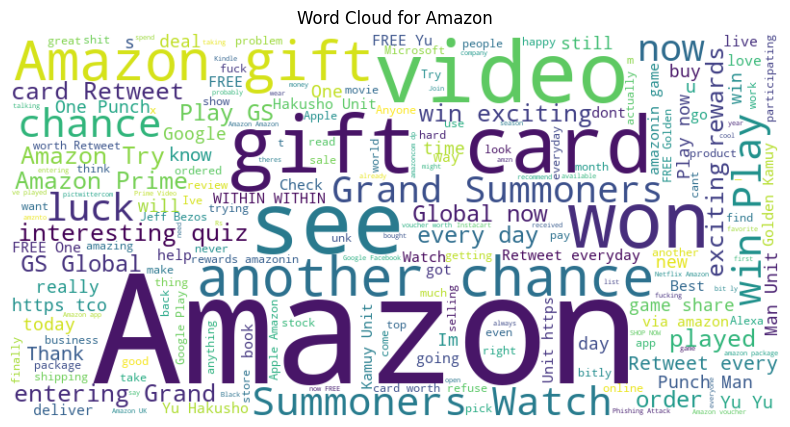

In [21]:
from wordcloud import WordCloud

# Join all the text in the dataframe
text = ' '.join(topic_df['Text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for {topic}')
plt.show()


The word cloud analysis shows that the most prominent words are "Amazon", "Summoners", "watch", "card", "win", "exciting", "free", "grand", and "Retweet", indicating that these are the key topics and themes related to Amazon. Other moderately frequent words include "Lucknow", "quiz", "interacting", "game", "Play", "chance", "video", and "wild". The less frequent words provide additional context and details about Amazon-related experiences, products, and services.

# Pie Chart for Sentiment Proportion

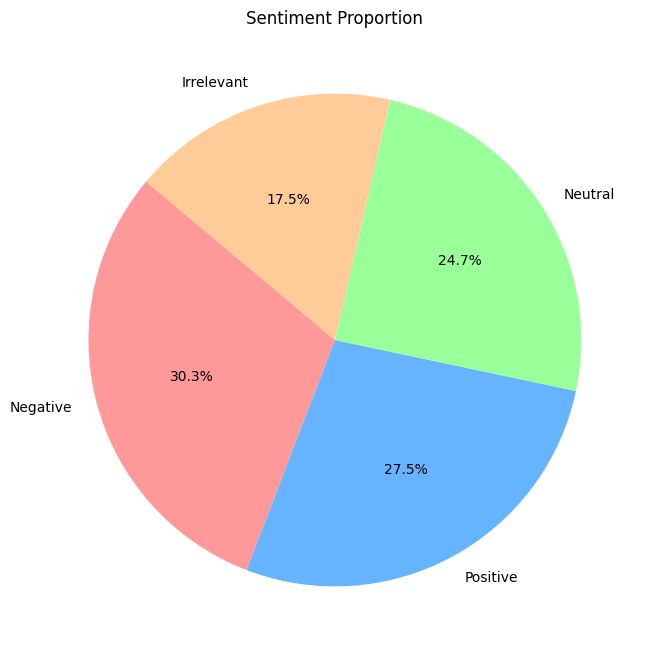

In [34]:
sentiment_counts = df['Sentiment'].value_counts()
# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Sentiment Proportion')
plt.show()

The piechart shows that the largest proportion of the sentiments is Negative at 30.3%, followed by Neutral at 24.7%, Positive at 27.5%, and Irrelevant at 17.5%.

# Heatmap for Sentiment Co-occurrence

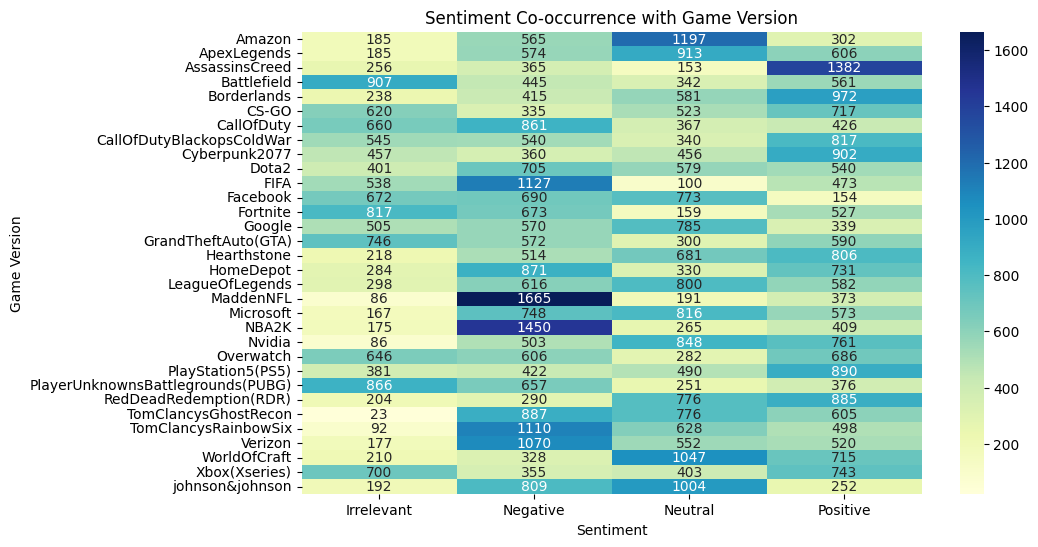

In [23]:
# Sample data with game version
df = pd.DataFrame(df)

# Create a cross-tabulation
heatmap_data = pd.crosstab(df['Game'], df['Sentiment'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Sentiment Co-occurrence with Game Version')
plt.xlabel('Sentiment')
plt.ylabel('Game Version')
plt.show()

## Observations:
- **Irrelevant Comments**: The game version with the highest number of irrelevant comments is Xbox(Xseries) with 700 comments, followed by CallOfDuty with 660 comments and Facebook with 672 comments.

- **Negative Comments**: The game version with the highest number of negative comments is MaddenNFL with 1665 comments, followed by NBAZK with 1450 comments and TomClancysRainbowSix with 1110 comments.

- **Neutral Comments**: The game version with the highest number of neutral comments is WorldOFCraft with 1047 comments, followed by Microsoft with 816 comments and Nvidia with 848 comments.

- **Positive Comments**: The game version with the highest number of positive comments is AssassinsCreed with 1382 comments, followed by PlayStation5(PS5) with 890 comments and RedDeadRedemption(RDR) with 885 comments.

- **Total Comments**: The game version with the highest total number of comments is MaddenNFL with 2515 comments, followed by TomClancysRainbowSix with 2328 comments and Verizon with 2319 comments.

# Histogram for Sentiment Lengths

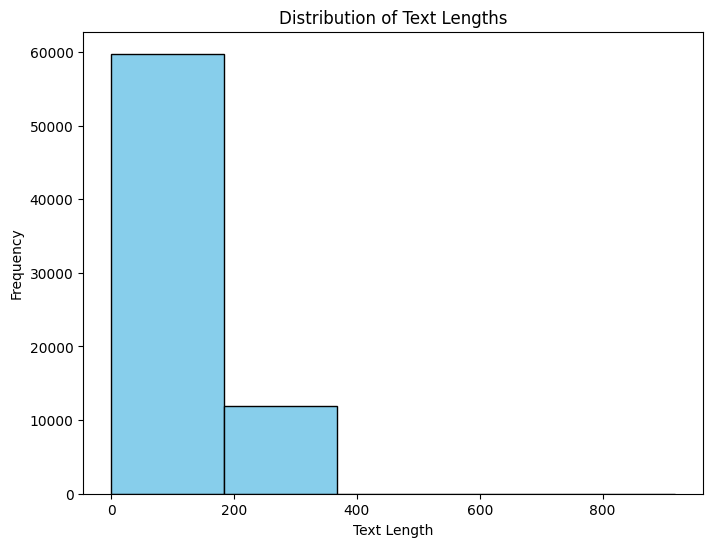

In [24]:
df = pd.DataFrame(df)

# Calculate text lengths
df['Text Length'] = df['Text'].apply(len)

# Plot histogram of text lengths
plt.figure(figsize=(8, 6))
plt.hist(df['Text Length'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

The plot indicates that the majority of texts have a length of around 0 characters, as shown by the large bar on the left. There are also some texts with lengths around 200 and 400 characters, as indicated by the smaller bars on the right side of the plot.

# Box Plot for Sentiment Lengths

<Figure size 800x600 with 0 Axes>

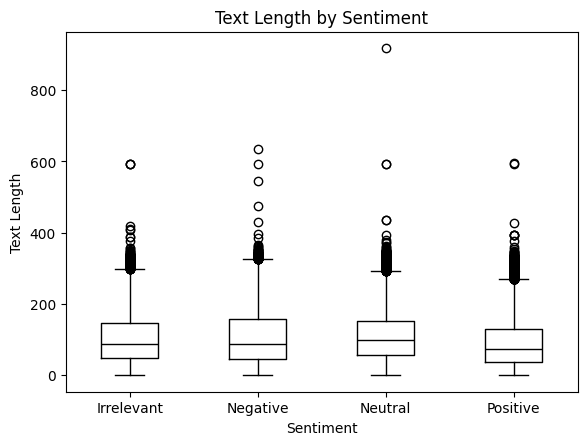

In [25]:
# Plot box plot of text lengths by sentiment
plt.figure(figsize=(8, 6))
df.boxplot(column='Text Length', by='Sentiment', grid=False, color='black')
plt.title('Text Length by Sentiment')
plt.suptitle('')  # Remove the default subplot title
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()


### Insights:
- **Irrelevant**: The text length for irrelevant comments has a relatively narrow range, with the median value around 330 characters.
- **Negative**: The text length for negative comments has the widest distribution, with the median value around 590 characters. This suggests that users tend to express their negative sentiment through longer, more detailed comments.
-**Neutral**: The text length for neutral comments has a more compact distribution, with the median value around 375 characters.
- **Positive**: The text length for positive comments has a wider distribution compared to neutral, but narrower than negative, with the median value around 440 characters.


# Count Plot for Sentiment Occurrences

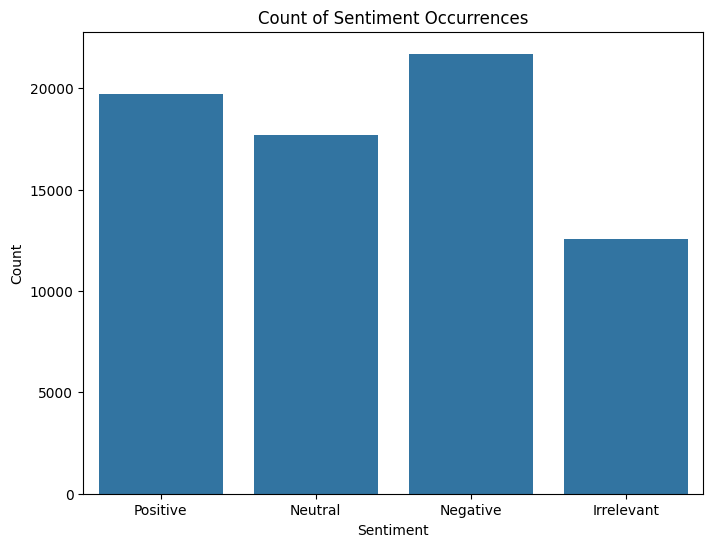

In [26]:
# Plot count plot for sentiment occurrences
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Count of Sentiment Occurrences')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

The plot shows the total count of occurrences for each sentiment category:

- **Negative**: 19,275 occurrences, the highest among all sentiment categories.

- **Positive**: 18,902 occurrences, the second-highest.

- **Neutral**: 17,942 occurrences, the third-highest.

- **Irrelevant**: 13,789 occurrences, the lowest among all sentiment categories.

# Pair Plot for Sentiment Analysis

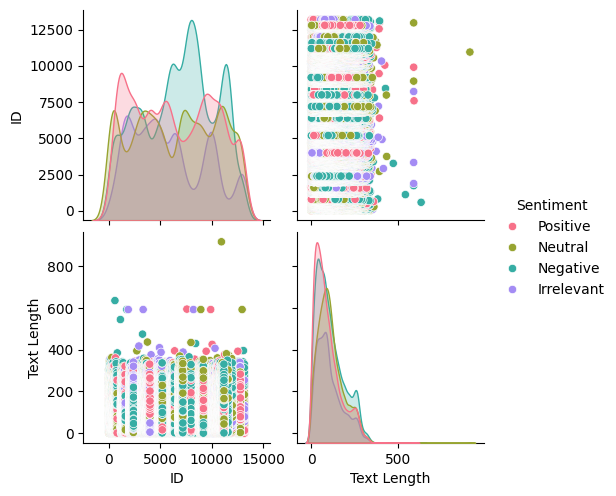

In [27]:
#Pair Plot for Sentiment Analysis
sns.pairplot(df, hue='Sentiment', palette='husl')
plt.show()

### Sentiment Distribution Scatter Plot
- Shows sentiment categories (Positive, Neutral, Negative, Irrelevant) across different "ID" values.
- Different colors represent sentiments; point sizes indicate text length.
- Reveals diverse sentiment distributions, with some IDs having predominant sentiments and others balanced.

### Text Length Distribution
- Histogram displays text lengths across the dataset.
- Right-skewed pattern: most comments are short, with a long tail of longer comments.
- Indicates users generally provide brief feedback, with a minority giving more detailed comments.

### Sentiment vs. Text Length
- Scatter plot explores sentiment and text length relationship.
- Longer texts are mostly negative or irrelevant; shorter texts are often positive or neutral.
- Confirms the trend seen in the "Text Length Distribution" chart.


-------